## Google AI

*From notebook 01.02-ModelsAPI.ipynb*

In [1]:
import base64
import os

from google import genai
from google.genai import types

In [ ]:
def gemini_thinking(parts: types.Part) -> types.GenerateContentResponse:
    """
    Génère une réponse du modèle Gemini et retourne la réponse brute complète
    au lieu de l'afficher par morceaux.

    Args:
        user_message: Le message utilisateur à envoyer au modèle

    Returns:
        La réponse brute complète du modèle sous forme de chaîne de caractères
    """
    client = genai.Client(
        api_key=os.environ.get("GOOGLE_AI_API_KEY"),
    )

    model = "gemini-2.0-flash-thinking-exp-01-21"  # "gemini-2.5-pro-exp-03-25"
    contents = [
        types.Content(
            role="user",
            parts=parts,
        ),
    ]
    generate_content_config = types.GenerateContentConfig(
        response_mime_type="text/plain",
    )

    # Au lieu de streamer la réponse, on récupère la réponse complète
    response = client.models.generate_content(
        model=model,
        contents=contents,
        config=generate_content_config,
    )

    # Retourne la réponse brute complète
    return response


## Par Zone Agricole

### JSON Data

In [8]:
import json

In [55]:
json_path = r"/mnt/mydisk/Projects/plu/data/raw/Grenoble/Par Zone Agricoles.json"
with open(json_path, "r", encoding="utf-8") as f:
    data = json.load(f)

data.keys()

dict_keys(['pages', 'model', 'usage_info'])

In [ ]:
instruction: str = types.Part.from_text(
    text="""
    Je vais te joindre un document à propos des zones agricoles de Grenoble. 
    Analyse ce document et indique les pages contenant des informations pertinentes pour chaque zone agricole.

    Réponds UNIQUEMENT au format JSON structuré comme suit, SANS inclure les balises ```json et ``` autour de ta réponse:
    {
    "Zone1": [liste des numéros de pages avec informations sur la zone Zone1],
    "Zone2": [liste des numéros de pages avec informations sur la zone Zone2],
    "Zone3": [liste des numéros de pages avec informations sur la zone Zone3],
    "...": [...],
    "informations_generales": [liste des numéros de pages avec informations communes à toutes les zones]
    }

    Instructions supplémentaires:
    1. Exclus les pages qui ne contiennent pas d'informations pertinentes (sommaires, préambules répétitifs)
    2. Inclus uniquement les numéros de page, pas de texte explicatif
    3. La réponse doit être convertible en JSON avec la fonction "json.loads()" de Python
    """
)

parts = [instruction]

for i, page in enumerate(data.get("pages")):
    parts.append(
        types.Part.from_text(
            text=json.dumps(f"PAGE {i + 1} : " + page["markdown"], ensure_ascii=False)
        )
    )

In [43]:
response = gemini_thinking(parts=parts)
print(response.text)

{
  "ZoneA": [3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
  "ZoneAL": [21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34],
  "ZoneN": [35, 36, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
  "ZoneNL": [51, 52, 53, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65],
  "informations_generales": [1, 6]
}


In [45]:
donnees = json.loads(response.text)
donnees

{'ZoneA': [3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 'ZoneAL': [21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34],
 'ZoneN': [35, 36, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
 'ZoneNL': [51, 52, 53, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65],
 'informations_generales': [1, 6]}

In [51]:
import numpy as np

In [54]:
donnees = {'ZoneA': [3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 'ZoneAL': [21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34],
 'ZoneN': [35, 36, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
 'ZoneNL': [51, 52, 53, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65],
 'informations_generales': [1, 6]}

array([{'index': 3, 'markdown': "CHAPITRE 1 - DESTINATION DES CONSTRUCTIONS, USAGE DES SOLS, ACTIVITES ET INSTALLATIONS, MIXITE FONCTIONNELLE ET SOCIALE ..... 5\nARTICLE 1 - CONSTRUCTIONS, USAGES ET AFFECTATIONS DES SOLS, ACTIVITÉS ET INSTALLATIONS INTERDITS ..... 5\n1.1. CONSTRUCTIONS INTERDITES ..... 5\n1.2. USAGES ET AFFECTATIONS DES SOLS INTERDITS ..... 6\n1.3. ACTIVITÉS ET INSTALLATIONS INTERDITES ..... 6\nARTICLE 2 - CONSTRUCTIONS, USAGES ET AFFECTATIONS DES SOLS, ACTIVITÉS ET INSTALLATIONS SOUMISES À CONDITIONS PARTICULIÈRES ..... 6\n2.1. CONSTRUCTIONS SOUMISES À DES CONDITIONS PARTICULIÈRES ..... 6\n2.2. USAGES ET AFFECTATIONS DES SOLS SOUMIS À DES CONDITIONS PARTICULIÈRES ..... 8\n2.3. ACTIVITÉS ET INSTALLATIONS SOUMISES À DES CONDITIONS PARTICULIÈRES ..... 9\nARTICLE 3 - MIXITÉ FONCTIONNELLE ET SOCIALE ..... 9\n3.1. DISPOSITIONS EN FAVEUR DE LA MIXITÉ COMMERCIALE ET FONCTIONNELLE ..... 9\n3.2. RÈGLES DIFFÉRENCIÉES ENTRE REZ-DE-CHAUSSÉE ET ÉTAGES SUPÉRIEURS ..... 9\n3.3. DISPO
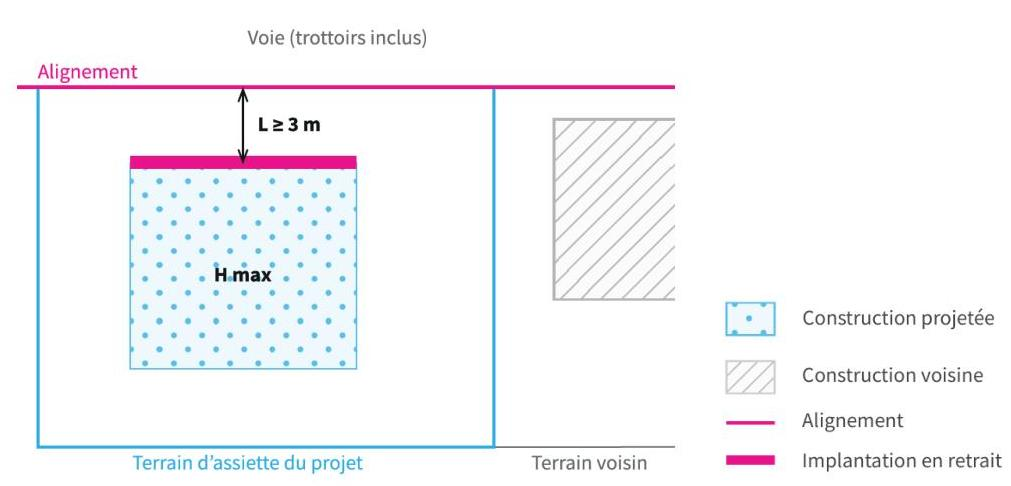
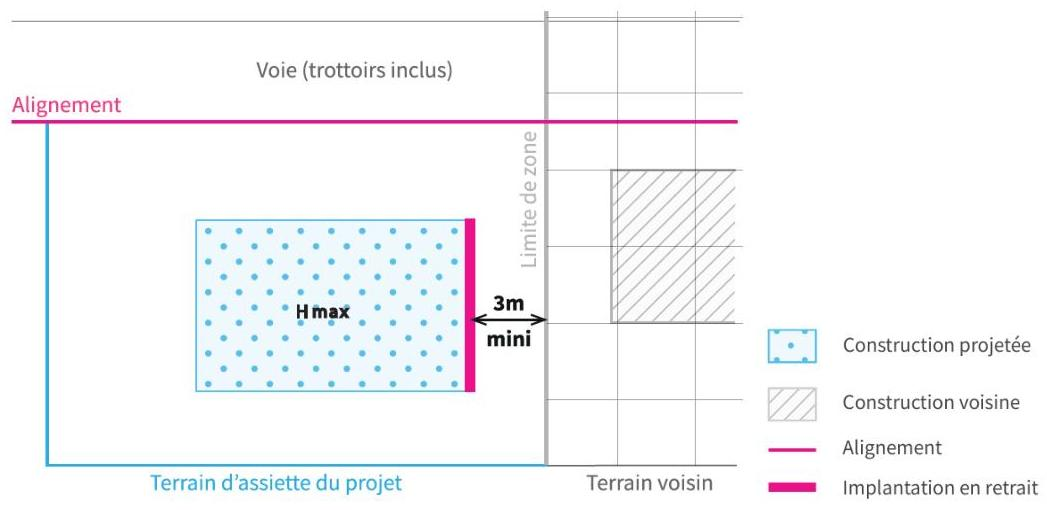
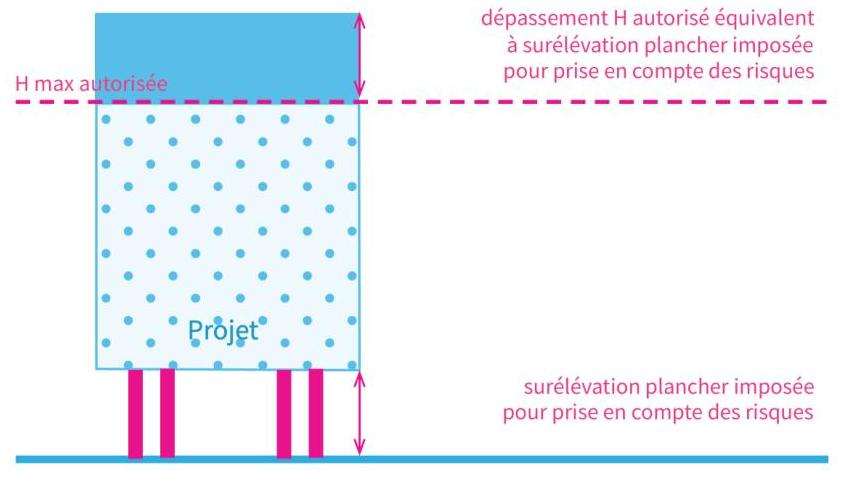

In [59]:
np.array(data["pages"])[donnees["ZoneA"]]